In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

RANDOM_SEED = 42

## Import Data

In [2]:
from sklearn.utils import shuffle

mcu = pd.read_csv("./data/mcu.csv")

min_line_count = 150

is_main_character = mcu["character"].value_counts() > min_line_count
is_main_character = is_main_character.rename("is main character", axis=0)

main_character_rows = is_main_character[mcu["character"]]
main_character_rows = main_character_rows.reset_index(drop=True)

mcu = mcu[main_character_rows]

y = mcu["character"].to_numpy().astype(str)
X = mcu["line"].to_numpy().astype(str)

X, y = shuffle(X, y, random_state=RANDOM_SEED)

X, y

(array(['Got it.', 'And terrifying.', 'What’s the delta rate?', ...,
        'I’m sorry. He seemed like a good man.', 'Heimdall, come on.',
        'I am a king!'], dtype='<U606'),
 array(['BRUCE BANNER', 'PEPPER POTTS', 'TONY STARK', ..., 'STEVE ROGERS',
        'THOR', 'LOKI'], dtype='<U12'))

## Models

In [4]:
from sklearn.pipeline import Pipeline

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics

import matplotlib.pyplot as plt

In [5]:
cross_validator = StratifiedKFold(n_splits=5, random_state=RANDOM_SEED, shuffle=True)
score_method = "balanced_accuracy"

Let's create two models: one that uses a TFIDF transformer and one that does not. 

### Model 1 (without TDIDF)

In [9]:
pipe1 = Pipeline([('vect', CountVectorizer()), 
                  ('clf', RandomForestClassifier(n_jobs=-1, 
                                                 random_state=RANDOM_SEED))])

parameters1 = {'vect__binary': [True, False],
              'vect__stop_words': [None, 'english'],
              'clf__criterion': ["gini", "entropy"],
              'clf__max_depth': [7,8,9,10,11,12,13],
              'clf__max_features': [None, "sqrt", "log2"],
              'clf__bootstrap': [True, False],
              'clf__max_samples': [None, 0.2, 0.4, 0.6, 0.8],
              'clf__oob_score': [True, False],}

model1 = GridSearchCV(pipe1, parameters1, scoring=score_method, n_jobs=-1, verbose=3)

results = cross_validate(model1, X, y, cv=cross_validator, 
                         scoring=score_method, return_estimator=True)

table = pd.DataFrame({score_method: results['test_score']})
table.index.name = "fold"
table.loc["mean"] = table[score_method].mean()
table.loc["std"] = table[score_method].std()
table.loc["max"] = table[score_method].max()

table

Fitting 5 folds for each of 3360 candidates, totalling 16800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:   20.4s
[Parallel(n_jobs=-1)]: Done 488 tasks      | elapsed:   31.2s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:   52.8s
[Parallel(n_jobs=-1)]: Done 1128 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1544 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 2024 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 3176 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 3848 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 4584 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 5384 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 6248 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 7176 tasks      | 

Fitting 5 folds for each of 3360 candidates, totalling 16800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:   21.4s
[Parallel(n_jobs=-1)]: Done 488 tasks      | elapsed:   32.9s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:   56.1s
[Parallel(n_jobs=-1)]: Done 1128 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1544 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 2024 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 3176 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 3848 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 4584 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 5384 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 6248 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 7176 tasks      | 

Fitting 5 folds for each of 3360 candidates, totalling 16800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:   21.0s
[Parallel(n_jobs=-1)]: Done 488 tasks      | elapsed:   32.3s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:   54.9s
[Parallel(n_jobs=-1)]: Done 1128 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1544 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 2024 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 3176 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 3848 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 4584 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 5384 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 6248 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 7176 tasks      | 

Fitting 5 folds for each of 3360 candidates, totalling 16800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:   20.9s
[Parallel(n_jobs=-1)]: Done 488 tasks      | elapsed:   32.2s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:   55.2s
[Parallel(n_jobs=-1)]: Done 1128 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1544 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 2024 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 3176 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 3848 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 4584 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 5384 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 6248 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 7176 tasks      | 

Fitting 5 folds for each of 3360 candidates, totalling 16800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:   21.6s
[Parallel(n_jobs=-1)]: Done 488 tasks      | elapsed:   33.3s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:   55.9s
[Parallel(n_jobs=-1)]: Done 1128 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1544 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 2024 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 3176 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 3848 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 4584 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 5384 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 6248 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 7176 tasks      | 

,balanced_accuracy
fold,
0,0.167433
1,0.149958
2,0.173290
3,0.170776
4,0.143002
mean,0.160892
std,0.012114
max,0.173290


### Model 2 (with TDIDF)

In [12]:
pipe2 = Pipeline([('vect', CountVectorizer()),
                  ('tfidf', TfidfTransformer()),
                  ('clf', RandomForestClassifier(n_jobs=-1, 
                                                 random_state=RANDOM_SEED))])

parameters2 = {'vect__binary': [True, False],
              'vect__stop_words': [None, 'english'],
              'tfidf__norm': ['l1', 'l2'],
              'tfidf__use_idf': [True, False],
               'tfidf__smooth_idf': [True, False],
              'clf__criterion': ["gini", "entropy"],
              'clf__max_depth': [7,8,9,10,11,12,13],
              'clf__max_features': [None, "sqrt", "log2"],
              'clf__bootstrap': [True, False],
              'clf__max_samples': [None, 0.2, 0.4, 0.6, 0.8],
              'clf__oob_score': [True, False],}

model2 = GridSearchCV(pipe2, parameters2, scoring=score_method, n_jobs=-1, verbose=3)

results = cross_validate(model2, X, y, cv=cross_validator, 
                         scoring=score_method, return_estimator=True)

table = pd.DataFrame({score_method: results['test_score']})
table.index.name = "fold"
table.loc["mean"] = table[score_method].mean()
table.loc["std"] = table[score_method].std()
table.loc["max"] = table[score_method].max()

table

Fitting 5 folds for each of 26880 candidates, totalling 134400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:   32.5s
[Parallel(n_jobs=-1)]: Done 488 tasks      | elapsed:   52.1s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1128 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1544 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 2024 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 3176 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 3848 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 4584 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 5384 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 6248 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 7176 tasks      | 

Fitting 5 folds for each of 26880 candidates, totalling 134400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:   15.1s
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:   32.7s
[Parallel(n_jobs=-1)]: Done 488 tasks      | elapsed:   54.4s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1128 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1544 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 2024 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 3176 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 3848 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 4584 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 5384 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 6248 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 7176 tasks      | 

Fitting 5 folds for each of 26880 candidates, totalling 134400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:   12.9s
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:   31.8s
[Parallel(n_jobs=-1)]: Done 488 tasks      | elapsed:   53.4s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1128 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1544 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 2024 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 3176 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 3848 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 4584 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 5384 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 6248 tasks      | elapsed:  8.2min
[Parallel(n_jobs=-1)]: Done 7176 tasks      | 

Fitting 5 folds for each of 26880 candidates, totalling 134400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:   31.8s
[Parallel(n_jobs=-1)]: Done 488 tasks      | elapsed:   51.1s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1128 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1544 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 2024 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 3176 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 3848 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 4584 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 5384 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 6248 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 7176 tasks      | 

Fitting 5 folds for each of 26880 candidates, totalling 134400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:   33.4s
[Parallel(n_jobs=-1)]: Done 488 tasks      | elapsed:   55.1s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1128 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1544 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 2024 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 3176 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 3848 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 4584 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 5384 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 6248 tasks      | elapsed:  8.1min
[Parallel(n_jobs=-1)]: Done 7176 tasks      | 

,balanced_accuracy
fold,
0,0.152446
1,0.143748
2,0.169510
3,0.164649
4,0.144523
mean,0.154975
std,0.010455
max,0.169510


Looks like model 1 performed better.  Let's see it's confusion matrix on a random train / test split of the data in case there are any obvious patterns.

Fitting 5 folds for each of 3360 candidates, totalling 16800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:   23.9s
[Parallel(n_jobs=-1)]: Done 488 tasks      | elapsed:   38.0s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 1128 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1544 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 2024 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 3176 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 3848 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 4584 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 5384 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 6248 tasks      | elapsed:  9.2min
[Parallel(n_jobs=-1)]: Done 7176 tasks      | 

balanced_accuracy: 0.15251245792504234


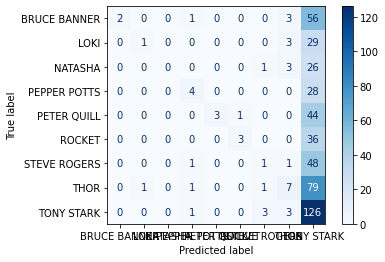

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

model1.fit(X_train,y_train)
yhat = model1.predict(X_test)

print("balanced_accuracy:", metrics.balanced_accuracy_score(y_test, yhat))

plot = metrics.plot_confusion_matrix(model1, X_test, y_test,
                             values_format = 'd',
                             cmap=plt.cm.Blues)

## Conclusions

It looks like Random Forest did even worse than Naive Bayes!  It also took forever to train, which is probably because I passed so many options to GridSearchCV.   From the confusion matrix above, it looks like the resulting model just guesses Tony Stark for every example.  I'm confused as to why this is, because the GridSearchCV is training using balanced accuracy.  I bet if I spent more time on this, I could make many improvements.  However, since it's yielding such a low base accuracy, I think I'll move onto SVM.